In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Read the data
df = pd.read_csv('Excel_info_meta_analisis_full.csv', encoding='latin1')
df.info()
# Normalize text in relevant columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Author                24 non-null     object 
 1   year                  24 non-null     int64  
 2   Title                 24 non-null     object 
 3   Type_study            24 non-null     object 
 4   Type_study_clean      23 non-null     object 
 5   Number_species        23 non-null     object 
 6   Number_species_clean  23 non-null     float64
 7   Taxon                 24 non-null     object 
 8   Phenophases           22 non-null     object 
 9   climate_variable      24 non-null     object 
 10  effect_magnitud       24 non-null     object 
 11  Main results          24 non-null     object 
 12  Region                24 non-null     object 
 13  Observations          17 non-null     object 
 14  Opinion               10 non-null     object 
 15  More_information      3 n

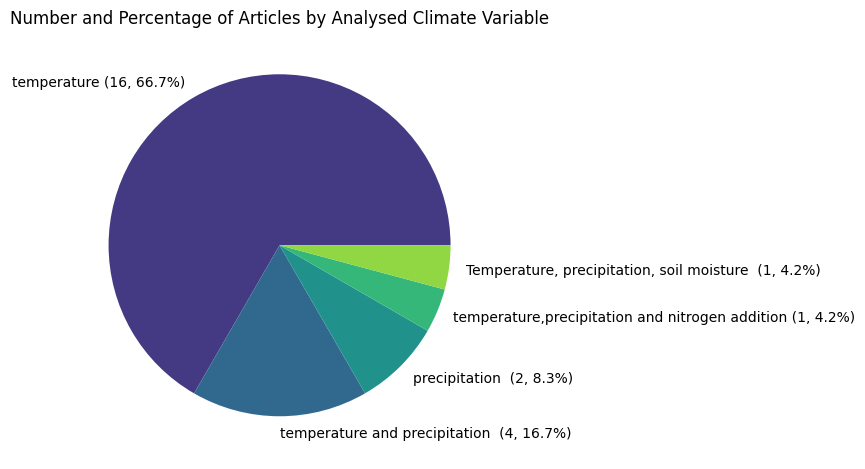

In [7]:
# Ensure a clean background
plt.style.use("default")

# Calculate absolute values and percentages
climate_variable_counts = df['climate_variable'].value_counts()
climate_variable_percentages = climate_variable_counts / climate_variable_counts.sum() * 100

# Create labels with absolute values and percentages
labels = [f"{var} ({count}, {perc:.1f}%)" for var, count, perc in zip(climate_variable_counts.index, climate_variable_counts, climate_variable_percentages)]

# Create the figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor("white")  # Set axes background to white

# Plot the pie chart (removing autotexts from unpacking)
wedges, texts = ax.pie(
    climate_variable_counts, labels=labels,
    colors=sns.color_palette('viridis', len(climate_variable_counts)),
    textprops={'color': "black"}  # Ensure text is black for readability
)

# Set the title in English
plt.title('Number and Percentage of Articles by Analysed Climate Variable', color="black")
plt.tight_layout()
plt.show()


Temperature—specifically, increasing warming—is the most studied climate variable in meta-analyses and reviews on phenology and climate change, appearing in 92% of the articles. Precipitation regimes are also widely examined, whereas other environmental variables remain less studied

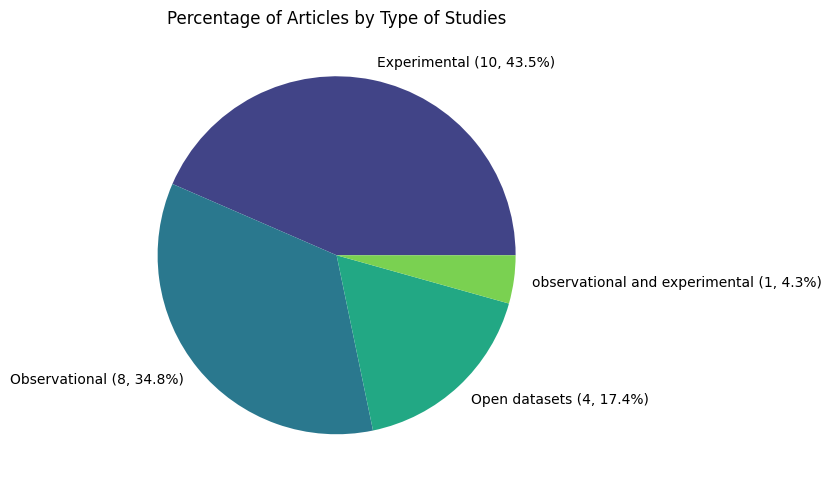

In [8]:
# Ensure a clean background
plt.style.use("default")

# Calculate absolute values and percentages
type_study_clean_counts = df['type_study_clean'].value_counts()
type_study_percentages = type_study_clean_counts / type_study_clean_counts.sum() * 100

# Create labels with absolute values and percentages
labels = [f"{var} ({count}, {perc:.1f}%)" for var, count, perc in zip(type_study_clean_counts.index, type_study_clean_counts, type_study_percentages)]

# Create the figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor("white")  # Set axes background to white

# Plot the pie chart (removing autotexts from unpacking)
wedges, texts = ax.pie(
    type_study_clean_counts, labels=labels,
    colors=sns.color_palette('viridis', len(type_study_clean_counts)),
    textprops={'color': "black"}  # Ensure text is black for readability
)

# Set the title in English
plt.title('Percentage of Articles by Type of Studies', color="black")
plt.tight_layout()
plt.show()

I classified the articles based on the type of study used as primary studies, including observational studies (time series), experimental studies, and open datasets. The articles that used experimental studies were the most represented (almost 43.5%), followed by those using observational studies and open datasets, and finally, those combining both observational and experimental studies (4.3%, only one article, Wolkovich et al., 2012). 

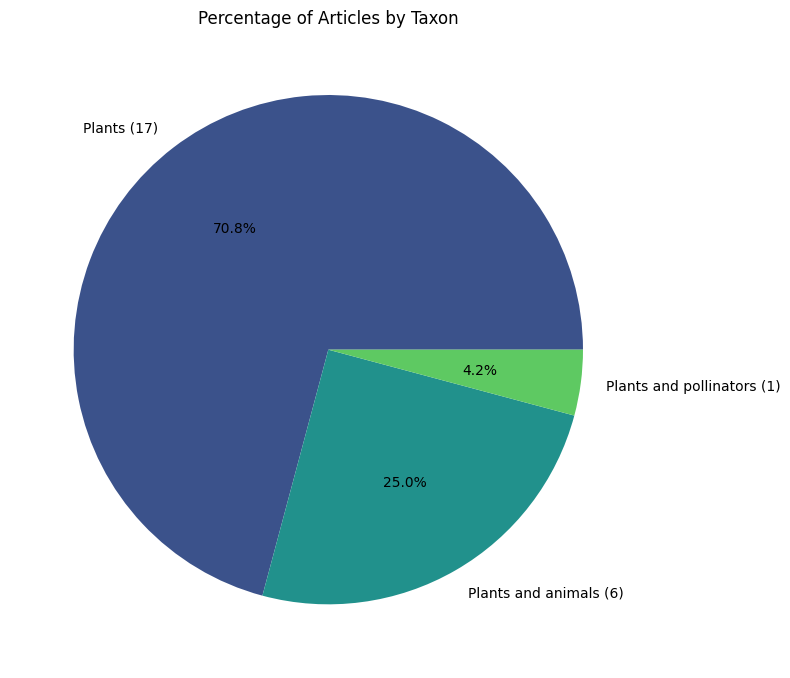

In [9]:
# Ensure a clean white background
plt.style.use("default")

# Calculate the count and percentage of articles for each taxon
taxon_counts = df['taxon'].value_counts()
taxon_percentages = (taxon_counts / taxon_counts.sum()) * 100

# Create labels with absolute counts and percentages
labels = [f"{taxon} ({count})" for taxon, count in zip(taxon_counts.index, taxon_counts)]

# Create the figure with a white background
plt.figure(figsize=(8, 8))
plt.pie(
    taxon_percentages, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('viridis', len(taxon_counts))
)

# Set the title in English
plt.title('Percentage of Articles by Taxon')
plt.tight_layout()
plt.show()


Plants are the most represented taxon across the articles (70.8 %). The remaining articles examine the phenology of both plants and animals, but only 4.2 % specifically focus on plants and pollinators.

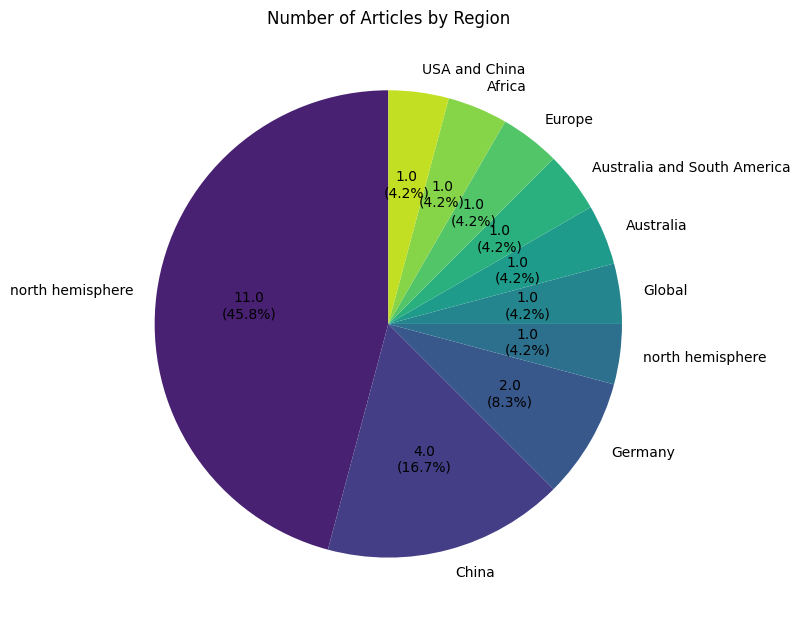

In [10]:
# Calculate the absolute values and the percentage
region_counts = df['region'].value_counts()
region_percentages = df['region'].value_counts(normalize=True) * 100

# Function to format both absolute values and percentages
def func(pct, allvalues):
    absolute = round(pct / 100. * sum(allvalues), 0)
    return f"{absolute}\n({pct:.1f}%)"

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct=lambda pct: func(pct, region_counts), 
        colors=sns.color_palette('viridis', len(region_counts)), startangle=90)

# Set background to white
plt.gcf().patch.set_facecolor('white')

# Set chart title
plt.title('Number of Articles by Region')

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


This figure suggests a strong geographical bias in the studies, with most research coming from a limited number of regions, particularly the north hemisphere and China. Only one study incorporate studies from South America. 

C:\Users\vmarq\AppData\Local\Temp\ipykernel_22336\1055497915.py:22: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vmarq\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


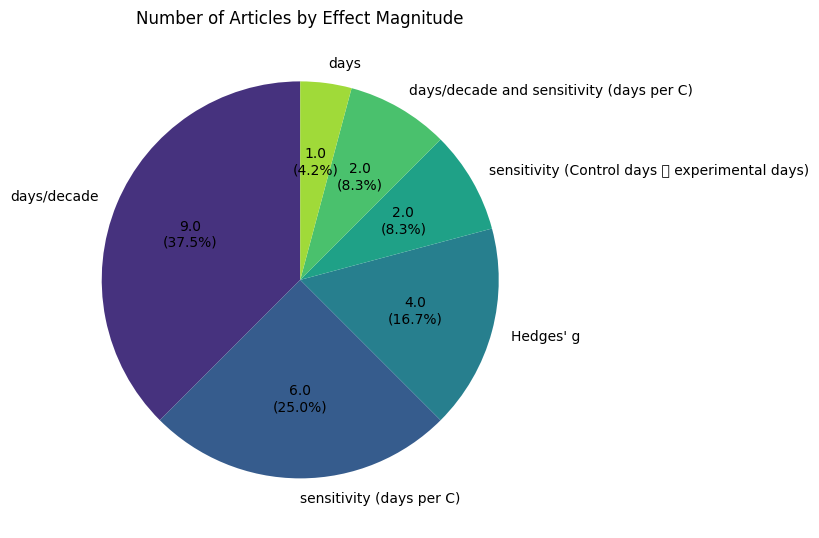

In [11]:
# Calculate the absolute values and the percentage
effect_magnitud_counts = df['effect_magnitud'].value_counts()
effect_magnitud_percentages = df['effect_magnitud'].value_counts(normalize=True) * 100

# Function to format both absolute values and percentages
def func(pct, allvalues):
    absolute = round(pct / 100. * sum(allvalues), 0)
    return f"{absolute}\n({pct:.1f}%)"

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(effect_magnitud_counts, labels=effect_magnitud_counts.index, autopct=lambda pct: func(pct, effect_magnitud_counts), 
        colors=sns.color_palette('viridis', len(effect_magnitud_counts)), startangle=90)

# Set background to white
plt.gcf().patch.set_facecolor('white')

# Set chart title
plt.title('Number of Articles by Effect Magnitude')

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


The most commonly used variables to estimate phenological changes were days per decade (present in 37.5% of the articles) and various estimations of sensitivity

C:\Users\vmarq\AppData\Local\Temp\ipykernel_22336\3334000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


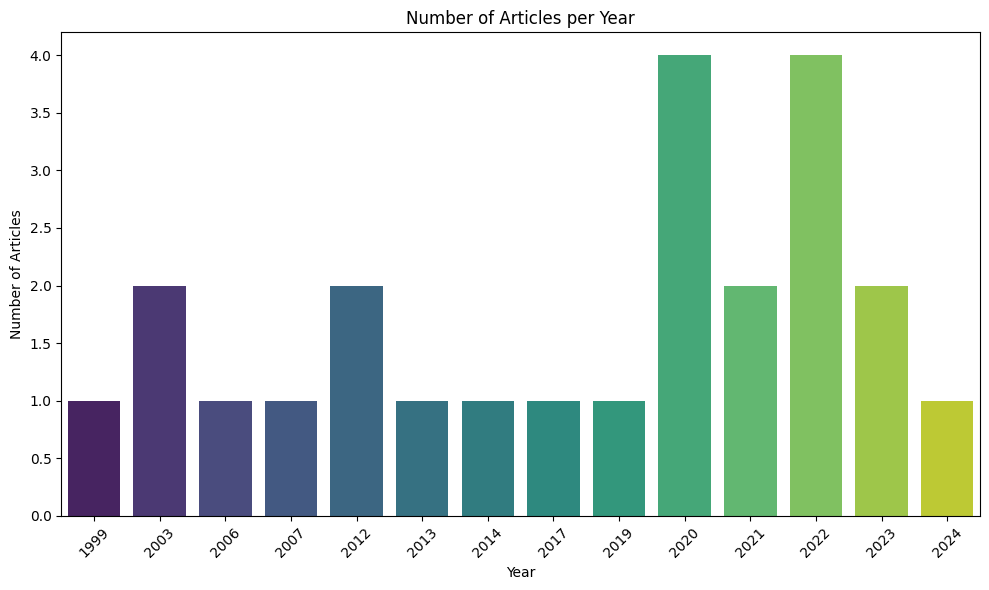

In [12]:
# Bar plot of the number of articles per year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

This graphic suggests growing interest in the research topic, particularly in the past five years. Peaks in 2020 (4 studies) and 2022 (4 studies) could indicate an increase in awareness, funding, or significant advances in methodology.The rise in studies aligns with global trends in ecology and climate change research, where phenology, species interactions, and climate effects are increasingly studied.